In [2]:
from pymongo import MongoClient
import pandas as pd
import numpy as np

In [3]:
def _connect_mongo():
    """ A util for making a connection to mongo """
    host = "localhost"
    port = 27017
    username = ""
    password = ""
    db = "5gopt"

    if username and password:
        mongo_uri = 'mongodb://%s:%s@%s:%s/%s' % (username, password, host, port, db)
        conn = MongoClient(mongo_uri)
    else:
        conn = MongoClient(host, port)


    return conn[db]

In [4]:
def collection_read_mongo(collection, query={}, no_id = True):
    db = _connect_mongo()
    cursor = db[collection].find(query)
    df = pd.DataFrame(list(cursor))

    if no_id:
        try:
            del df["_id"]
        except:
            pass
    return df

In [5]:
data = collection_read_mongo(collection="main_file_with_UserTHR")

In [6]:
data.shape

(2202660, 9)

In [7]:
data[:3]

,CellID,LocationX,LocationY,RSRP,RSRQ,SINR,Time,UserID,UserThR
0,1,361.511436,361.511436,-67.061741,NaN,86,0.2,1,86
1,2,361.511436,361.511436,-83.859050,NaN,77,0.2,1,77
2,3,361.511436,361.511436,-83.203628,NaN,15,0.2,1,15


In [9]:
testData = data[:10000]

In [10]:
wantedDF = pd.DataFrame(columns=["Time", "User", "LocationX", "LocationY", "RSRP_1st", "1stRSRP_Corresponding_RSRQ",
                                 "Serving_Cell","RSRP_2nd", "2ndRSRP_Corresponding_RSRQ", "RSRP_3rd", "3rdRSRP_Corresponding_RSRQ",
                                 "RSRP_4th", "4thRSRP_Corresponding_RSRQ"])
i = 0
jj = 0
for stamp, group in testData.groupby(["Time", "UserID"]):
    #     rsrp_top3 = [0,0,0]
    #     rsrp_matched_record_index = [0, 0,0]
    rsrpIndexList = list()
    for j in range(group.shape[0]):
        rsrpIndexList.append((jj, group["RSRP"][jj]))
        jj += 1
    rsrpIndexListSorted = sorted(rsrpIndexList, key=lambda x: x[1], reverse=True)
    row_rsrp1st = group.loc[rsrpIndexListSorted[0][0]]
    a = row_rsrp1st["Time"]
    b = int(row_rsrp1st["UserID"])    
#     if (rsrpIndexListSorted[1][0] == int(998)):
# #         print(group.loc[998])
# #         print(group.loc[998]["RSRP"])
# #         print(group.index)
#         print(rsrpIndexListSorted)
    c = row_rsrp1st["LocationX"]
    d = row_rsrp1st["LocationY"]
    e = row_rsrp1st["RSRP"]
    f = row_rsrp1st["RSRQ"]
    g = int(row_rsrp1st["CellID"])
#     if (rsrpIndexListSorted[1][0] == int(998)):
# #         print(group.loc[998])
# #         print(group.loc[998]["RSRP"])
# #         print(group.index)
#         print(rsrpIndexListSorted)
    try:
        h = group.loc[rsrpIndexListSorted[1][0]]["RSRP"]
    except:
        h = None
    try:
        p = group.loc[rsrpIndexListSorted[1][0]]["RSRQ"]
    except:
        p = None
    try:
        k = group.loc[rsrpIndexListSorted[2][0]]["RSRP"]
    except:
        k = None
    try:
        l = group.loc[rsrpIndexListSorted[2][0]]["RSRQ"]
    except:
        l = None
    try:
        m = group.loc[rsrpIndexListSorted[3][0]]["RSRP"]
    except:
        m = None
    try:
        n = group.loc[rsrpIndexListSorted[3][0]]["RSRQ"]
    except:
        n = None
    # wantedDF.append([{"Time": a, "User": b, "LocationX": c, "LocationY": d, "RSRP_1st": e, "1stRSRP_Corresponding_RSRQ": f,
    #                 "Serving_Cell": g,"RSRP_2nd":h, "2ndRSRP_Corresponding_RSRQ": p, "RSRP_3rd": k, "3rdRSRP_Corresponding_RSRQ":l,
    #                              "RSRP_4th":m, "4thRSRP_Corresponding_RSRQ": n}], ignore_index=True)
    wantedDF.loc[i] = [a, b, c, d, e, f, g, h, p, k, l, m, n]
    i += 1


In [11]:
wantedDF.head(10)

,Time,User,LocationX,LocationY,RSRP_1st,1stRSRP_Corresponding_RSRQ,Serving_Cell,RSRP_2nd,2ndRSRP_Corresponding_RSRQ,RSRP_3rd,3rdRSRP_Corresponding_RSRQ,RSRP_4th,4thRSRP_Corresponding_RSRQ
0,0.2,1.0,361.511436,361.511436,-67.061741,NaN,1.0,-78.677853,NaN,-83.203628,NaN,-83.859050,NaN
1,0.2,2.0,115.645597,115.645597,-70.510089,NaN,2.0,-76.322449,NaN,-77.959624,NaN,-81.337600,NaN
2,0.2,3.0,508.575506,508.575506,-59.578504,NaN,9.0,-72.264892,NaN,-77.128955,NaN,-78.963633,NaN
3,0.2,4.0,-56.111591,-56.111591,-74.415211,NaN,6.0,-76.524749,NaN,-82.282601,NaN,-90.343716,NaN
4,0.2,5.0,560.222412,560.222412,-76.896658,NaN,9.0,-78.247008,NaN,-80.598858,NaN,-86.688084,NaN
5,0.2,6.0,314.432120,314.432120,-72.087363,NaN,9.0,-73.701493,NaN,-77.195675,NaN,-88.472338,NaN
6,0.2,7.0,436.666424,436.666424,-69.656379,NaN,1.0,-77.415517,NaN,-85.754520,NaN,-90.150642,NaN
7,0.2,8.0,473.794748,473.794748,-67.629274,NaN,9.0,-77.987573,NaN,-80.917269,NaN,-84.305032,NaN
8,0.2,9.0,-185.847039,-185.847039,-77.306348,NaN,6.0,-84.278224,NaN,-84.625498,NaN,-85.726998,NaN
9,0.2,10.0,-140.331367,-140.331367,-67.313930,NaN,5.0,-82.450073,NaN,-85.256550,NaN,-89.393429,NaN


In [21]:
# clearn rows which contains none column value
cleanedWantedDF = wantedDF.dropna(axis=0, how="any")

In [13]:
# apply MDS dimension reduction technology
from sklearn.manifold import MDS

In [15]:
seed = np.random.RandomState(seed=3)

In [16]:
seed

In [22]:
mds = MDS(n_components=2, max_iter=1000, eps=1e-9, random_state=seed, dissimilarity="euclidean", n_jobs=2)

In [28]:
pos = mds.fit_transform(cleanedWantedDF)

In [29]:
pos

array([[  99.91802022,  147.80627035],
       [ -91.52194429, -142.32135009],
       [ 188.40758985,  344.00129308],
       ..., 
       [-180.19476634, -288.29942581],
       [-169.68541993, -339.65429546],
       [  43.57219749,   35.39243691]])

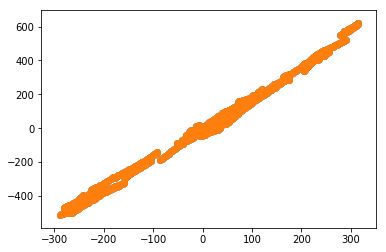

In [32]:
import matplotlib.pyplot as plt
plt.scatter(pos[:, 0], pos[:, 1])
plt.show()

In [33]:
mds3D = MDS(n_components=3, max_iter=1000, eps=1e-7, random_state=seed, dissimilarity="euclidean", n_jobs=2)

In [34]:
out = mds3D.fit_transform(cleanedWantedDF)

In [37]:
out[:3]

array([[   3.78552174,  100.70901557, -147.55674385],
       [ -11.11964387,  -89.22703649,  143.16036242],
       [  34.49011447,  218.56172113, -324.37860619]])

In [39]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection="3d")

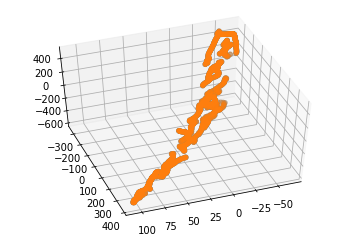

In [42]:
ax.scatter3D(out[:,0], out[:,1], out[:,2])
ax.view_init(azim=70, elev=50)
plt.show()

/home/yizhou/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


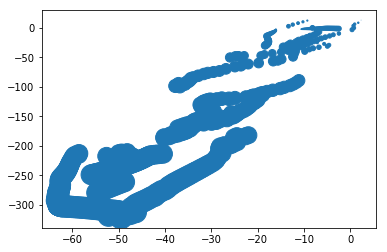

In [38]:

plt.scatter(out[:, 0], out[:, 1], out[:,2])
plt.show()

In [44]:
# after getting reduced-dimensional data, then calculate the nearest neighbor iterately
# store the embedded measurement in csv file, reference database
np.savetxt('embedding.csv', out, delimiter=",")

In [45]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")

<IPython.core.display.Latex object>

In [47]:
Latex(r"""\begin{eqnarray}
D_{k-NNAD}(x_{i}, k, D_{M}) = \frac{1}{N_{tr}} \sum_{N_{tr}}^{i=1} I(d_{t} <= d_{i}) \\
\end{eqnarry}""")

<IPython.core.display.Latex object>

In [50]:
# use cross validation method, k-fold, k = 10
from sklearn.model_selection import KFold
k = 10
kf = KFold(n_splits = k)
indicesList = list()
for train, test in kf.split(out):
    indicesList.append((train, test))


In [ ]:

N_tr = len(indicesList[0][0])+len(indicesList[0][1])
# k means the top k nearest neighbor
k = 50 
trainData = np.take(out, indicesList[0][0])
testData = np.take(out, indicesList[0][1])

# for each data in test dataset, calculate distance between it and each data point in train dataset
# pick the top k(k=50)
for i in testData:
    distList = list()
    for j in trainData:
        distance = np.sqrt(np.sum((i-j)**2, axis=1))
        distList.append(distance)
#     sort distList and then pick the top k(k =50) elems
    distList = sorted(distList, reverse=True)
    topKDist = distList[:k]
    
        
        


In [25]:
pos.get_params()

{'dissimilarity': 'euclidean',
 'eps': 1e-09,
 'max_iter': 1000,
 'metric': True,
 'n_components': 2,
 'n_init': 4,
 'n_jobs': 2,
 'random_state': <mtrand.RandomState at 0x7f3102a80480>,
 'verbose': 0}

In [27]:
mds.get_params()

{'dissimilarity': 'euclidean',
 'eps': 1e-09,
 'max_iter': 1000,
 'metric': True,
 'n_components': 2,
 'n_init': 4,
 'n_jobs': 2,
 'random_state': <mtrand.RandomState at 0x7f3102a80480>,
 'verbose': 0}

In [2]:
def _connect_mongo():
    """ A util for making a connection to mongo """
    host = "localhost"
    port = 27017
    username = ""
    password = ""
    db = "5gopt"

    if username and password:
        mongo_uri = 'mongodb://%s:%s@%s:%s/%s' % (username, password, host, port, db)
        conn = MongoClient(mongo_uri)
    else:
        conn = MongoClient(host, port)


    return conn[db]

In [3]:
def collection_read_mongo(collection, query={}, no_id = True):
    db = _connect_mongo()
    cursor = db[collection].find(query)
    df = pd.DataFrame(list(cursor))

    if no_id:
        try:
            del df["_id"]
        except:
            pass
    return df

In [4]:
data = collection_read_mongo(collection="main_file_with_UserTHR")

In [5]:
data.shape

(2202660, 9)

In [6]:
data[:3]

,CellID,LocationX,LocationY,RSRP,RSRQ,SINR,Time,UserID,UserThR
0,1,361.511436,361.511436,-67.061741,NaN,86,0.2,1,86
1,2,361.511436,361.511436,-83.859050,NaN,77,0.2,1,77
2,3,361.511436,361.511436,-83.203628,NaN,15,0.2,1,15


In [7]:
testData = data[:1000]

In [8]:
groupedData = 

In [24]:
max(data["Throughput"])

0.0

In [25]:
groupedData = data.groupby(["Time", "CellID"])[["Throughput"]].sum()

In [26]:
type(groupedData)

pandas.core.frame.DataFrame

In [27]:
groupedData[:5]

Throughput
Time CellID            
0.2  0              0.0
0.4  1              0.0
     2              0.0
     4              0.0
     5              0.0

In [17]:
df = groupedData.to_frame

In [23]:
groupedData[36.2, 2]

0.0

In [28]:
groupedData["Throughput"]

Time  CellID
0.2   0         0.0
0.4   1         0.0
      2         0.0
      4         0.0
      5         0.0
      6         0.0
      7         0.0
      8         0.0
      9         0.0
0.6   1         0.0
      2         0.0
      4         0.0
      5         0.0
      6         0.0
      7         0.0
      8         0.0
      9         0.0
0.8   1         0.0
      2         0.0
      4         0.0
      5         0.0
      6         0.0
      7         0.0
      8         0.0
      9         0.0
1.0   1         0.0
      2         0.0
      4         0.0
      5         0.0
      6         0.0
               ... 
37.2  3         0.0
      4         0.0
      5         0.0
      6         0.0
      8         0.0
      9         0.0
37.4  1         0.0
      2         0.0
      3         0.0
      4         0.0
      5         0.0
      6         0.0
      8         0.0
      9         0.0
37.6  1         0.0
      2         0.0
      3         0.0
      4         0.0
      5